
# Analysis of Greenhouse Gas (GHG) Inventory Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The Greenhouse Gas (GHG) Inventory Data contains the most recently submitted information, covering the period from 1990 to the latest available year, to the extent the data have been provided. The GHG data contain information on anthropogenic emissions by sources and removals by sinks of the six principal GHGs (carbon dioxide (CO2), methane (CH4), nitrous oxide (N2O), hydrofluorocarbons (HFCs), perfluorocarbons (PFCs), and sulphur hexafluoride (SF6)) that are not controlled by the Montreal Protocol.

GHG emission inventories are developed by Parties to the Convention using scientific and methodological guidance from the Intergovernmental Panel on Climate Change (IPCC), such as Revised Guidelines for National Greenhouse Gas Inventories (1996), IPCC Good Practice Guidance and Uncertainty Management in National Greenhouse Gas Inventories (2000) and IPCC Good Practice Guidance on Land Use, Land-use Change and Forestry (2003).

Last update in UNdata: 8 Jan 2015 with data released in Nov 2014
Next update in UNdata: Nov 2015



PUBLISHER
IBM Cloud Data Services
SOURCE
http://data.un.org/Explorer.aspx
TERMS OF USE
http://data.un.org/Host.aspx?Content=UNdataUse


### Question(s) for Analysis
* Has the level of greenhouse gases emitted in Sweden decreased or increased over the the stipulated period in this dataset?
* Major components of the greenhouse gases emitted in Sweden?
* Years of highest and lowest emission of greenhouse gases in Sweden.

### Data wrangling

In [1]:
#loading the necessary libraries
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')

In [2]:
#reading the csv file
df = pd.read_csv('greenhouse.csv')

In [3]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country or Area    989 non-null    object 
 1   Year               989 non-null    int64  
 2   co2_gigagrams      989 non-null    float64
 3   hfc_gigagrams      879 non-null    float64
 4   methane_gigagrams  989 non-null    float64
 5   pfc_gigagrams      763 non-null    float64
 6   sf6_gigagrams      919 non-null    float64
 7   n2o_gigagrams      966 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 61.9+ KB


In [4]:
#showing first 5 rows of the dataset
df.head()

,Country or Area,Year,co2_gigagrams,hfc_gigagrams,methane_gigagrams,pfc_gigagrams,sf6_gigagrams,n2o_gigagrams
0,Australia,2012,397830.6047,7945.106379,111709.4988,253.697462,134.111252,25775.42951
1,Australia,2011,398161.3872,7512.150105,110274.7423,259.250564,134.136620,25201.09362
2,Australia,2010,399364.8191,6942.606891,109062.6389,243.764011,145.185945,24451.85748
3,Australia,2009,398668.7713,6353.309697,110806.5324,307.886656,143.230925,24897.90320
4,Australia,2008,399084.1509,5810.538264,113592.7600,381.135610,158.400094,25546.77744


In [5]:
#renaming the columns['Country or Area'] to ['country'] and ['Year'] to ['year'] 
df = df.rename(columns={'Country or Area': 'country', 'Year': 'year'})

In [6]:
df.head()

,country,year,co2_gigagrams,hfc_gigagrams,methane_gigagrams,pfc_gigagrams,sf6_gigagrams,n2o_gigagrams
0,Australia,2012,397830.6047,7945.106379,111709.4988,253.697462,134.111252,25775.42951
1,Australia,2011,398161.3872,7512.150105,110274.7423,259.250564,134.136620,25201.09362
2,Australia,2010,399364.8191,6942.606891,109062.6389,243.764011,145.185945,24451.85748
3,Australia,2009,398668.7713,6353.309697,110806.5324,307.886656,143.230925,24897.90320
4,Australia,2008,399084.1509,5810.538264,113592.7600,381.135610,158.400094,25546.77744


In [7]:
#removing _gigagrams from the columns names
names = []
for column in df.columns:
    if '_gigagrams' in column:
        names.append(column[ : -10])
    else:
        names.append(column)

df.columns = names

In [8]:
df.head()

,country,year,co2,hfc,methane,pfc,sf6,n2o
0,Australia,2012,397830.6047,7945.106379,111709.4988,253.697462,134.111252,25775.42951
1,Australia,2011,398161.3872,7512.150105,110274.7423,259.250564,134.136620,25201.09362
2,Australia,2010,399364.8191,6942.606891,109062.6389,243.764011,145.185945,24451.85748
3,Australia,2009,398668.7713,6353.309697,110806.5324,307.886656,143.230925,24897.90320
4,Australia,2008,399084.1509,5810.538264,113592.7600,381.135610,158.400094,25546.77744


### Data cleaning

In [9]:
#checking for NaN/missing values
df.isna().any()

country    False
year       False
co2        False
hfc         True
methane    False
pfc         True
sf6         True
n2o         True
dtype: bool

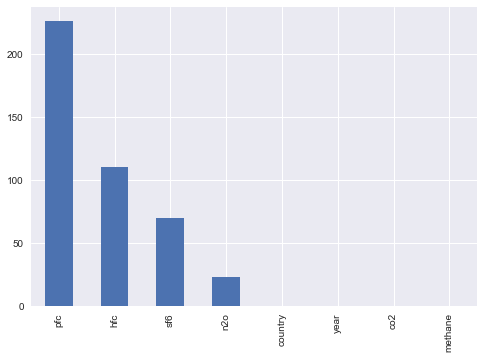

In [10]:
#visualizing the missing values
df.isna().sum().sort_values(ascending=False).plot(kind='bar');

#### Lots of values are missing in the pfc, hfc, sf6 and n20 columns respectively. In order to ensure a non-biased analysis, rows with the missing values will be dropped from the dataset.

In [11]:
#dropping NaNs
df.dropna(inplace=True)

In [12]:
#checking for NaNs
df.isna().sum()

country    0
year       0
co2        0
hfc        0
methane    0
pfc        0
sf6        0
n2o        0
dtype: int64

### Data exploratory analysis

In [13]:
#creating another column know as total_pollutants which is an aggregate of the greenhouses gases
df['total_pollutants'] = df['co2'] + df['hfc'] + df['methane'] + df['pfc'] + df['sf6'] + df['n2o']
df.head(2)

,country,year,co2,hfc,methane,pfc,sf6,n2o,total_pollutants
0,Australia,2012,397830.6047,7945.106379,111709.4988,253.697462,134.111252,25775.42951,543648.448102
1,Australia,2011,398161.3872,7512.150105,110274.7423,259.250564,134.136620,25201.09362,541542.760409


In [14]:
#top 20 countries with the lowest emissions of greenhouses gases in aggregate in ascending order
df_lowest_20 = df.groupby(['country'])['total_pollutants'].sum()
df_lowest_20.sort_values()[:20]

country
Monaco           9.703426e+02
Liechtenstein    4.237748e+03
Malta            3.796729e+04
Estonia          5.833524e+04
Iceland          8.021899e+04
Croatia          1.132452e+05
Luxembourg       1.537889e+05
Bulgaria         2.450387e+05
Slovenia         3.538544e+05
Slovakia         9.413295e+05
Portugal         1.132249e+06
Switzerland      1.210414e+06
Norway           1.214394e+06
Denmark          1.348289e+06
Ireland          1.454473e+06
New Zealand      1.502935e+06
Sweden           1.586757e+06
Hungary          1.594358e+06
Finland          1.663599e+06
Austria          1.911856e+06
Name: total_pollutants, dtype: float64

In [15]:
#top 20 countries with the highest emissions of greenhouse gases in aggregate in descending order
df_highest_20 = df.groupby(['country'])['total_pollutants'].sum()
df_highest_20.sort_values(ascending=False)[:20]

country
European Union        1.179810e+08
Russian Federation    5.273732e+07
Japan                 3.009611e+07
Germany               2.419702e+07
United Kingdom        1.604649e+07
Canada                1.450101e+07
France                1.269489e+07
Italy                 1.223389e+07
Australia             1.120768e+07
Spain                 8.195138e+06
Poland                7.798290e+06
Ukraine               5.926354e+06
Netherlands           4.888357e+06
Turkey                4.552169e+06
Romania               3.510404e+06
Belgium               2.949053e+06
Greece                2.759458e+06
Czech Republic        2.589879e+06
Austria               1.911856e+06
Finland               1.663599e+06
Name: total_pollutants, dtype: float64

### Focusing on Sweden for further analysis.
#### Sweden is one of the top 20 countries with the lowest emission of greenhouse gases in the period of years dataset provided.

In [16]:
#filtering for sweden
df_sweden = df[df['country'].isin(['Sweden'])].sort_values('year')
df_sweden.tail()

,country,year,co2,hfc,methane,pfc,sf6,n2o,total_pollutants
855,Sweden,2008,49980.29270,868.360878,5249.778938,225.051630,83.868741,6611.950143,63019.303030
854,Sweden,2009,46519.84195,869.912453,5146.516598,35.333435,80.913743,6450.962646,59103.480824
853,Sweden,2010,52283.35983,848.435206,5047.129051,158.342109,72.399043,6669.822790,65079.488030
852,Sweden,2011,48482.51608,820.095664,4944.187198,183.430126,60.248157,6270.552173,60761.029398
851,Sweden,2012,45713.25184,774.542627,4807.239425,68.919909,55.087781,6191.406682,57610.448264


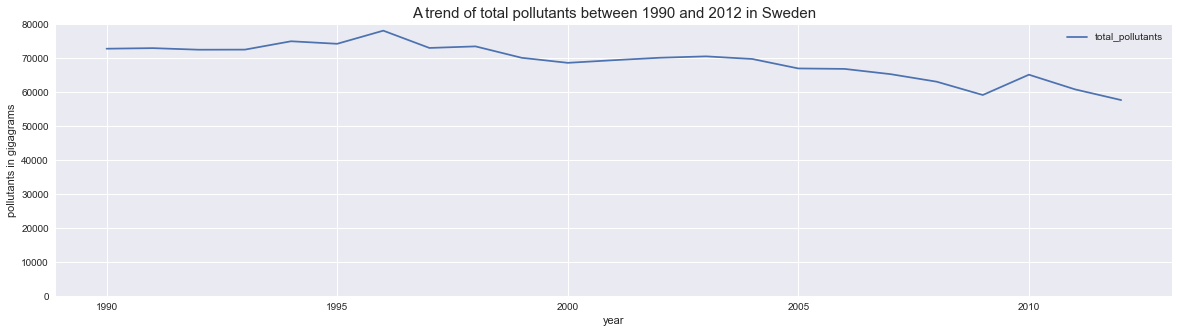

In [17]:
df_sweden_sorted = df_sweden.sort_values('year')
df_sweden_sorted.plot(kind='line', x='year', y='total_pollutants', figsize=(20,5))
plt.title('A trend of total pollutants between 1990 and 2012 in Sweden', fontsize=15)
plt.ylabel('pollutants in gigagrams')
plt.ylim((0, 80000))
plt.show()

#### This visualization shows there has been a significant drop in the level of the pollutants in sweden from 1990 to 2012

In [18]:
#percent drop in total pollutants
def percent_drop(column):
    '''a function to return percent drop in emission'''
    emission_1990 = df_sweden_sorted[column].iat[0]
    emission_2012 = df_sweden_sorted[column].iat[-1]
    drop_percent = (emission_2012 - emission_1990) / df_sweden_sorted[column].sum() * 100
    return np.round(drop_percent, 2)

percent_drop('total_pollutants')

-0.95

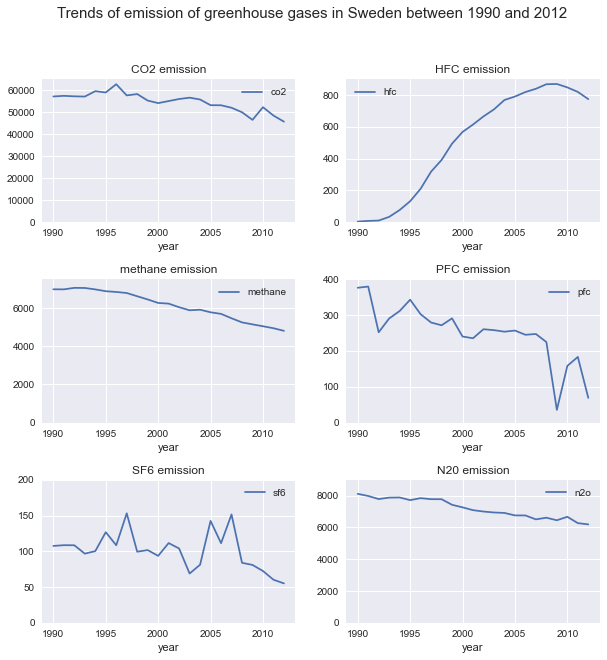

In [19]:
fig, axes = plt.subplots(3, 2, figsize=(10,10))
df_sweden_sorted.plot(kind='line', x='year', y='co2', ax=axes[0][0]).set_ylim((0,65000))
axes[0][0].set_title('CO2 emission')
df_sweden_sorted.plot(kind='line', x='year', y='hfc', ax=axes[0][1]).set_ylim((0,900))
axes[0][1].set_title('HFC emission')
df_sweden_sorted.plot(kind='line', x='year', y='methane', ax=axes[1][0]).set_ylim((0,7500))
axes[1][0].set_title('methane emission')
df_sweden_sorted.plot(kind='line', x='year', y='pfc', ax=axes[1][1]).set_ylim((0,400))
axes[1][1].set_title('PFC emission')
df_sweden_sorted.plot(kind='line', x='year', y='sf6', ax=axes[2][0]).set_ylim((0,200))
axes[2][0].set_title('SF6 emission')
df_sweden_sorted.plot(kind='line', x='year', y='n2o', ax=axes[2][1]).set_ylim((0,9000))
axes[2][1].set_title('N20 emission')
plt.subplots_adjust(hspace=0.4)
plt.suptitle('Trends of emission of greenhouse gases in Sweden between 1990 and 2012', fontsize=15);

In [20]:
#percent drop in co2
percent_drop('co2')

-0.91

In [21]:
#percent drop in hfc
percent_drop('hfc')

6.62

In [22]:
##percent drop in methane
percent_drop('methane')

-1.54

In [23]:
#percent drop in pfc
percent_drop('pfc')

-5.33

In [24]:
#percent drop in sf6
percent_drop('sf6')

-2.25

In [25]:
##percent drop in n2o
percent_drop('n2o')

-1.16

#### All greenhouse gases emission shown a downward trend except HFC which had a strong positive linear regression.

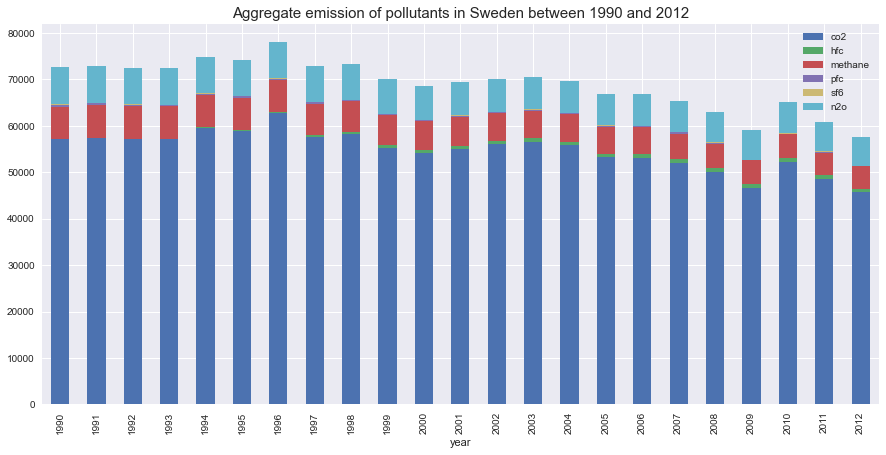

In [26]:
df_pollutants_agg_year = df_sweden_sorted.drop('total_pollutants', axis=1)
df_pollutants_agg_year.plot(kind='bar', x='year', stacked=True, figsize=(15,7))
plt.title('Aggregate emission of pollutants in Sweden between 1990 and 2012', fontsize=15);

#### Co2 has always been the major component of the greenhouse gases released into the environment alongside methane and n2o.

In [27]:
#year with the highest emission for sweden
highest_emission = df_sweden_sorted['total_pollutants'].max()
highest_emission_year = (df_sweden_sorted[df_sweden_sorted['total_pollutants'] == highest_emission])[['year']]
highest_emission_year

,year
867,1996


In [28]:
#year with lowest emission for sweden
lowest_emission = df_sweden_sorted['total_pollutants'].min()
lowest_emission_year = (df_sweden_sorted[df_sweden_sorted['total_pollutants'] == lowest_emission])[['year']]
lowest_emission_year

,year
851,2012


<Figure size 1008x432 with 0 Axes>

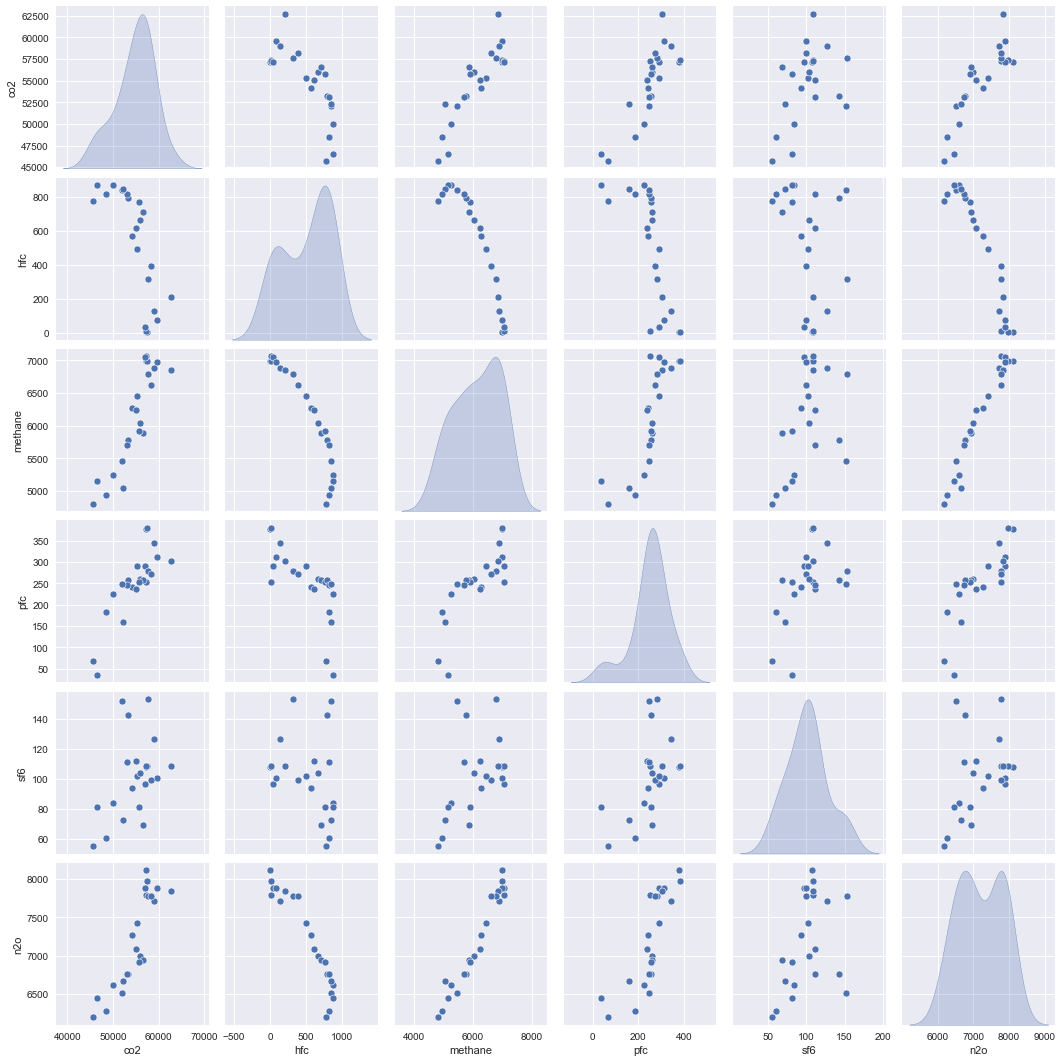

In [29]:
#visualizing the relationships between the greenhouse gases 
plt.figure(figsize=(14,6))
sns.pairplot(df_sweden_sorted[['co2', 'hfc', 'methane', 'pfc', 'sf6', 'n2o']], diag_kind='kde');

#### This plot further confirms the thought that emission of greenhouse gases(co2, methane, pfc, sf6 and n2o) were on the downward trend except for hfc which was upward. The distributions of the co2, hfc, methane and pfc are left-skewed and unimodal while the distributions for sf6 is right-skewed and unimodal, N2o has a bell-shaped distribution although with a bimodal peak.

In [30]:
#mathematical values of the correlation between the greenhouse gases.
df_corr = df_sweden_sorted.drop(['year', 'total_pollutants'], axis=1).corr()
df_corr

,co2,hfc,methane,pfc,sf6,n2o
co2,1.000000,-0.744931,0.886005,0.832761,0.439218,0.869601
hfc,-0.744931,1.000000,-0.923152,-0.707216,-0.299492,-0.940341
methane,0.886005,-0.923152,1.000000,0.813639,0.475673,0.975083
pfc,0.832761,-0.707216,0.813639,1.000000,0.516000,0.796650
sf6,0.439218,-0.299492,0.475673,0.516000,1.000000,0.394785
n2o,0.869601,-0.940341,0.975083,0.796650,0.394785,1.000000


## Conclusions

#### There has been a signficant drop in the emission of greenhouses gases in aggregate from 1990 to 2012 in Sweden which was 0.95%. Negative values indicates decrease while positive values means increase. Emission of greenhouse gases such as co2, methane, pfc, sf6 and n20 have decreased by 0.91%, 1.54%, 5.33%, 2.25% and 1.16% respectively while hfc have increased by 6.62% during the period when this data was recorded. Although, correlation does not mean causation, there seems to be a correlation between the emission of greenhouse gases(co2, methane, pfc, sf6, n20) to the emission of hfc.
#### Co2, methane and N20 are the major components of greenhouse gases emitted in sweden.
#### 1996 was the year Sweden had highest emission in greenhouse gases while 2012 was the year recorded with the lowest emission of greenhouse gases.